# NetCDF Files Unload Process In Python
### By Jenifer Vivar

In [4]:
#helpful modules
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc #This library will allow us to read NetCDF files
import pandas as pd
import seaborn as sns

**When we print a dataset suing nc only the metadata of the file will be printed. Below you'll se a summary of the vriables the file has as well as some information about how the data was taken**

In [5]:
path = "/Users/jenifervivar/Desktop/Fall 2021 NOAA Project/030321CCNY.nc"
data = nc.Dataset(path, mode = 'r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    location: New York City (City College of New York)
    system: Multiple-wavelength Aerosol Lidar
    latitude: 40.821 deg North
    longitude: 73.949 deg West
    elevation: 100 m
    zenith_angle: 0 deg
    laser0_polarization: Linear polarization
    laser0_divergence: 0.5 mrad
    laser0_prf: 30 Hz
    telesc0_fov: 2 mrad
    telesc0_diameter: 0.5 meter
    range_resol: 3.750000e+00 meter
    time_resol: 1 minute
    year: 2021.0
    month: 3.0
    day: 3.0
    constant1064: 14660.0
    constant532: 5204.0
    constant355: 3433.0
    dimensions(sizes): time(189), range(3995)
    variables(dimensions): float32 time(time), float32 range(range), float64 abs_355(time, range), float64 abs_532(time, range), float64 abs_1064(time, range), float32 range_resol(), float32 time_resol(), float32 elevation(), float32 latitude(), float32 longitude()
    groups: 


**The method below allo us to access the metadata more easily by using the file's dict-like properties.**

In [6]:
#METADATA ONLY
variables = data.__dict__
for i in variables:
    print(i, ":", variables[i])

location : New York City (City College of New York)
system : Multiple-wavelength Aerosol Lidar
latitude : 40.821 deg North
longitude : 73.949 deg West
elevation : 100 m
zenith_angle : 0 deg
laser0_polarization : Linear polarization
laser0_divergence : 0.5 mrad
laser0_prf : 30 Hz
telesc0_fov : 2 mrad
telesc0_diameter : 0.5 meter
range_resol : 3.750000e+00 meter
time_resol : 1 minute
year : 2021.0
month : 3.0
day : 3.0
constant1064 : 14660.0
constant532 : 5204.0
constant355 : 3433.0


**The `.dimensions.values()` method allow us to see the different hierarchys in the file. This is useful when we don't have Panoply available and we want to see what groups, if any, are in this file. The image below show us the typical hierarchy of a NetCDF file**
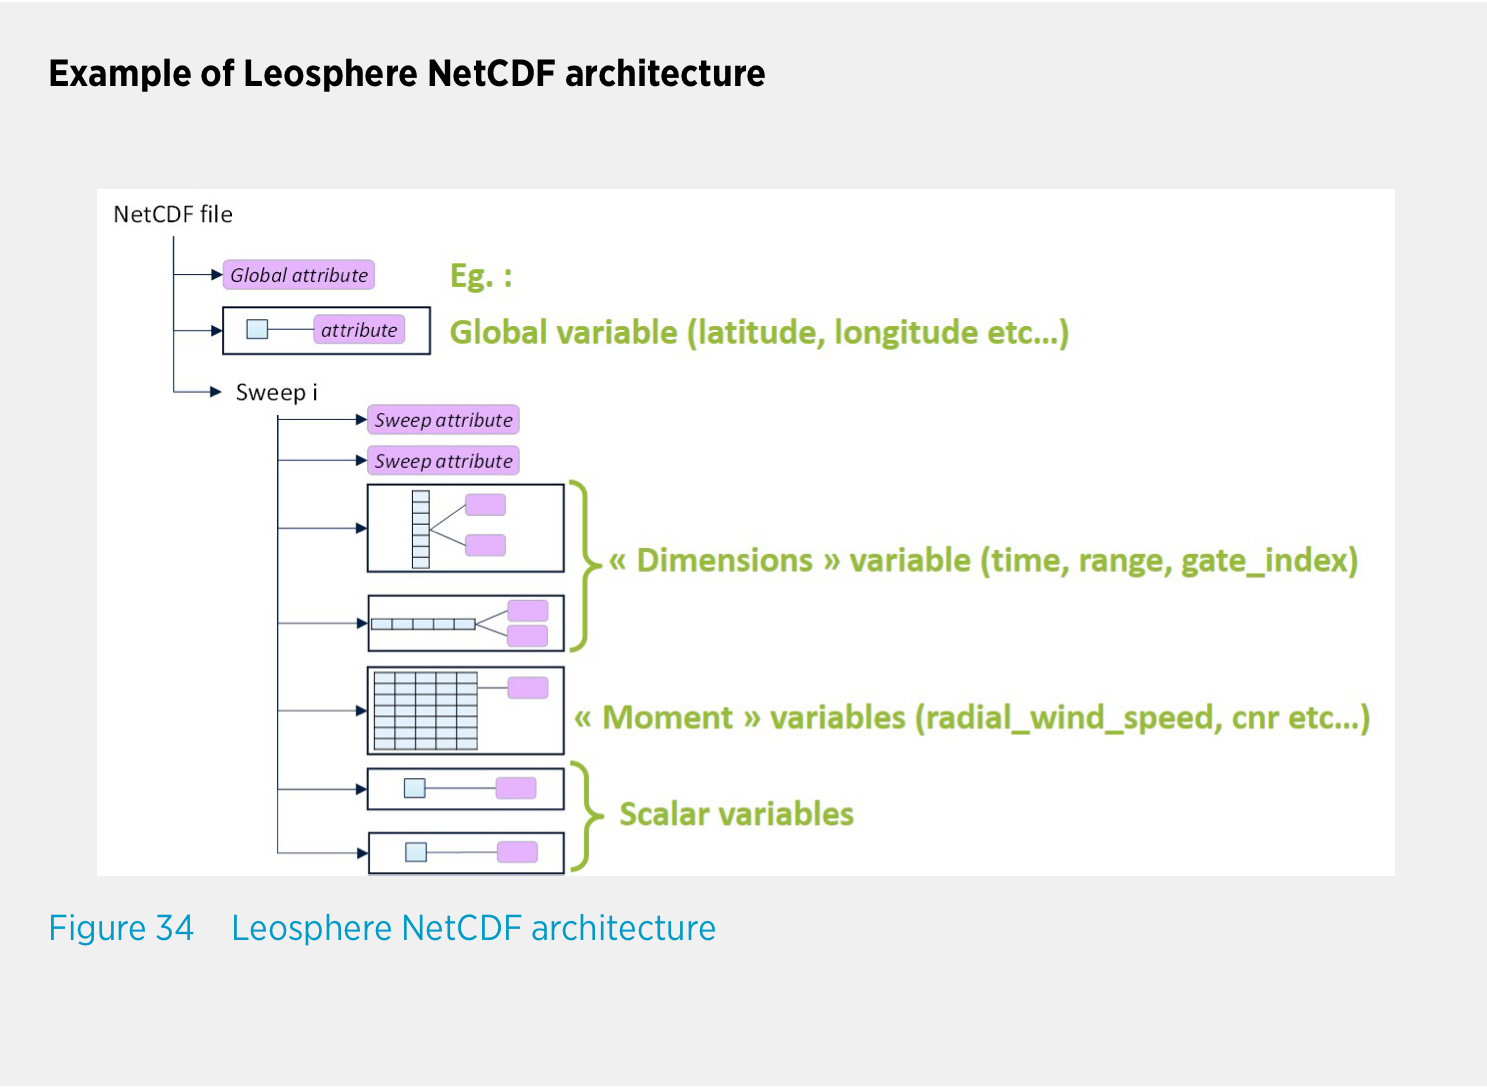

In [7]:
for dms in data.dimensions.values():
    print(dms)
    #var = data[dms][:]
    #print(var)
print(data.variables.keys())

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 189
<class 'netCDF4._netCDF4.Dimension'>: name = 'range', size = 3995
dict_keys(['time', 'range', 'abs_355', 'abs_532', 'abs_1064', 'range_resol', 'time_resol', 'elevation', 'latitude', 'longitude'])


In [13]:
data.close() #good practice to close all files

**Below I will try to see what variables are there from the fixed zip file. The fixed zip file contains themeasurments taken from the lidar that is pointing vertically. At the very bottom we can see that there are 3 groups in the file: georeference_correction, Sweep_474384 and lidar_calibration_group. The next cell also opens a NetCDF file that contains the same groups.**

In [14]:
path3 = "/Users/jenifervivar/Desktop/Fall 2021 NOAA Project/FXD20210830/WLS200s-94_2021-08-30_23-55-34_fixed_24_100m.nc"
fsd_data = nc.Dataset(path3, 'r')
print(fsd_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Leosphere Windcube data
    Conventions: CF/Radial 2.0 , CF-1.7
    institution: Leosphere
    references: 
    source: Lidar measurements
    history: Windcube Lidar server 3.2.1
    comment: 
    instrument_name: WLS200s-94
    dimensions(sizes): sweep(1)
    variables(dimensions): <class 'str'> instrument_type(), float64 latitude(), float64 longitude(), float64 altitude(), int32 sweep(sweep), <class 'str'> sweep_group_name(sweep), float64 sweep_fixed_angle(sweep)
    groups: georeference_correction, Sweep_474384, lidar_calibration_group


In [25]:
path6 = '/Users/jenifervivar/Desktop/Fall 2021 NOAA Project/FXD20210830/WLS200s-94_2021-08-30_22-09-00_fixed_24_100m.nc'
data6 = nc.Dataset(path6, moder = 'r') #makes the file readible in python
print(data6)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Leosphere Windcube data
    Conventions: CF/Radial 2.0 , CF-1.7
    institution: Leosphere
    references: 
    source: Lidar measurements
    history: Windcube Lidar server 3.2.1
    comment: 
    instrument_name: WLS200s-94
    dimensions(sizes): sweep(1)
    variables(dimensions): <class 'str'> instrument_type(), float64 latitude(), float64 longitude(), float64 altitude(), int32 sweep(sweep), <class 'str'> sweep_group_name(sweep), float64 sweep_fixed_angle(sweep)
    groups: georeference_correction, Sweep_474109, lidar_calibration_group


In [26]:
for dms in data6.dimensions.values():
    print(dms)

<class 'netCDF4._netCDF4.Dimension'>: name = 'sweep', size = 1


**use method `.groups["name of group"]` to access a group. If the group has another nested group then you shoul use the method as `.groups[name1].groups[name2]`... and so on. In this particular groups there are not arrays of values of interest**

In [29]:
unload = data6.groups['georeference_correction']
print(unload)

<class 'netCDF4._netCDF4.Group'>
group /georeference_correction:
    dimensions(sizes): 
    variables(dimensions): float64 azimuth_correction()
    groups: 


**Below its seen that group `Sweep_474109` has variables of interest. The comments indicate the meaning of the metadata obtain from the software manual of Leosphere 2000s**

In [31]:
unload1 = data6.groups['Sweep_474109']
print(unload1)
#res_file_name = nameof the resolution files integrated in the netCDF
#settings_id = ID of the settings that was used to generate this file
#res_id = the ID of the resolution that was use togenerate this file\
#scan_id = ID of the scan that was used to generate this file

<class 'netCDF4._netCDF4.Group'>
group /Sweep_474109:
    scan_file_name: Fixed pointing vertical for PBL info
    scan_id: 24
    settings_file_name: default320
    settings_id: 8
    res_file_name: 100m
    res_id: 11
    dimensions(sizes): scan_file_dim(1120), settings_file_dim(9600), res_file_dim(5216), time(120), range(50)
    variables(dimensions): |S1 scan_file(scan_file_dim), |S1 settings_file(settings_file_dim), |S1 res_file(res_file_dim), float64 ray_angle_resolution(), float64 range_gate_length(), int32 ray_accumulation_time(), <class 'str'> time_reference(), <class 'str'> sweep_mode(), int32 sweep_index(), float64 time(time), int32 range(range), <class 'str'> timestamp(time), float64 ray_index(time), float64 azimuth(time), float64 elevation(time), float64 cnr(time, range), int32 gate_index(range), float64 radial_wind_speed(time, range), float64 radial_wind_speed_ci(time, range), uint8 radial_wind_speed_status(time, range), float64 doppler_spectrum_width(time, range), float6

**Alaways use the `handle = variable['variable_name'][:]` format in order to get the values. If [:] is ommitted, only the metadata of the variable will be shown.**

In [61]:
carrier_to_noise_ratio = unload1["cnr"][:]
(carrier_to_noise_ratio)

masked_array(
  data=[[-12.44, -11.37, -10.21, ..., -32.09, -31.45, -32.47],
        [-12.59, -11.38, -10.46, ..., -30.03, -29.78, -33.09],
        [-12.6 , -11.49, -10.59, ..., -32.09, -30.73, -34.71],
        ...,
        [-13.31, -11.92, -10.32, ..., -33.02, -33.83, -34.17],
        [-13.3 , -11.85, -10.28, ..., -31.68, -31.63, -29.86],
        [-13.21, -11.86, -10.23, ..., -32.47, -33.64, -33.78]],
  mask=False,
  fill_value=1e+20)

In [49]:
radial_wind_speed_status = unload1["radial_wind_speed_status"][:] #0 for rejected values and 1 for accepted values 
#data is rejected when the confidence index is lower than  100
(radial_wind_speed_status)

masked_array(
  data=[[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],
  mask=False,
  fill_value=999999,
  dtype=uint8)

**Missing the [:] only shows the metadata as shown**

In [54]:
instrumental_function_x_max = unload1["instrumental_function_x_max"] #Max horixontal axis of the Lorentz 
#distribution obtain in the last calibration
instrumental_function_x_max

<class 'netCDF4._netCDF4.Variable'>
float64 instrumental_function_x_max()
    _FillValue: nan
    units: m
    long_name: instrumental_function_x_max
    comments: Maximum horizontal axis of the Lorentz distribution obtained in the last calibration.
    ancilliary_variables: instrumental_function_status
path = /Sweep_474109
unlimited dimensions: 
current shape = ()
filling on

**I'm still working on figuring out what masked means in this context**

In [56]:
instrumental_function_y_average = unload1["instrumental_function_y_average"][:]
instrumental_function_y_average

masked

In [45]:
doppler_spectrum_width = unload1["doppler_spectrum_width"][:] 
#full width at  half maximum of the spectrum. representative of particles speed dispersion in the range gate, noise?
doppler_spectrum_width

masked_array(
  data=[[0.79, 0.53, 0.54, ..., 0.29, 1.87, 0.16],
        [0.77, 0.54, 0.55, ..., 1.89, 1.51, 0.54],
        [0.69, 0.6 , 0.55, ..., 0.95, 0.61, 0.16],
        ...,
        [0.54, 0.56, 0.73, ..., 0.45, 0.49, 0.16],
        [0.52, 0.52, 0.69, ..., 0.62, 0.96, 0.97],
        [0.48, 0.52, 0.72, ..., 1.68, 0.36, 0.52]],
  mask=False,
  fill_value=1e+20)

In [43]:
elevation = unload1["elevation"][:] #almost 90 for all. angle relative to horizontal plane, 90 is the zenith
#angle  between the sun's rays and the vertical direction
elevation

masked_array(data=[89.986, 89.999, 89.999, 89.999, 89.999, 89.998, 89.996,
                   89.998, 89.998, 89.999, 89.999, 89.999, 90.   , 90.   ,
                   89.998, 90.   , 90.   , 90.   , 89.992, 89.999, 89.999,
                   89.998, 89.997, 89.999, 89.999, 89.999, 90.   , 89.998,
                   89.999, 89.999, 90.   , 90.   , 89.992, 89.999, 90.   ,
                   89.999, 89.999, 89.997, 89.999, 89.993, 89.999, 89.997,
                   89.996, 89.999, 89.999, 89.999, 89.997, 89.999, 89.994,
                   89.999, 90.   , 90.   , 90.   , 89.998, 90.   , 90.   ,
                   90.   , 90.   , 90.   , 90.   , 90.   , 90.   , 90.   ,
                   90.   , 90.   , 90.   , 90.   , 90.   , 90.   , 90.   ,
                   90.   , 90.   , 90.   , 90.   , 90.   , 90.   , 90.   ,
                   90.   , 90.   , 90.   , 90.   , 90.   , 90.   , 90.   ,
                   90.   , 90.   , 90.   , 90.   , 90.   , 90.   , 90.   ,
                   90.   

In [32]:
time_reference = unload1["time_reference"][:]# UTC reference date EPOCH
time_reference

'1970-01-01T00:00:00Z'

In [34]:
ray_angle_resolution = unload1["ray_angle_resolution"][:] #angle betwen the cenger of two consecutive rays
ray_angle_resolution

masked_array(data=0.,
             mask=False,
       fill_value=1e+20)

In [35]:
scan_file = unload1["scan_file"][:] #binary content of the file
scan_file

masked_array(data=[b':', b'\x19', b'm', ..., b'\xd3', b'j', b'D'],
             mask=[False, False, False, ..., False, False, False],
       fill_value=b'',
            dtype='|S1')

In [38]:
time = unload1["time"][:] #number of seconds between time reference and the end of each ray (aka EPOC time)
(time)

masked_array(data=[1.63036134e+09, 1.63036134e+09, 1.63036134e+09,
                   1.63036134e+09, 1.63036134e+09, 1.63036135e+09,
                   1.63036135e+09, 1.63036135e+09, 1.63036135e+09,
                   1.63036135e+09, 1.63036135e+09, 1.63036135e+09,
                   1.63036135e+09, 1.63036135e+09, 1.63036135e+09,
                   1.63036136e+09, 1.63036136e+09, 1.63036136e+09,
                   1.63036136e+09, 1.63036136e+09, 1.63036136e+09,
                   1.63036136e+09, 1.63036136e+09, 1.63036136e+09,
                   1.63036136e+09, 1.63036137e+09, 1.63036137e+09,
                   1.63036137e+09, 1.63036137e+09, 1.63036137e+09,
                   1.63036137e+09, 1.63036137e+09, 1.63036137e+09,
                   1.63036137e+09, 1.63036137e+09, 1.63036138e+09,
                   1.63036138e+09, 1.63036138e+09, 1.63036138e+09,
                   1.63036138e+09, 1.63036138e+09, 1.63036138e+09,
                   1.63036138e+09, 1.63036138e+09, 1.63036138e

In [39]:
ray_index =unload1["ray_index"][:] #identification number of each ray
ray_index

masked_array(data=[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
                     9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
                    18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
                    27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
                    36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
                    45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
                    54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
                    63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
                    72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
                    81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
                    90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
                    99., 100., 101., 102., 103., 104., 105., 106., 107.,
                   108., 109., 110., 111., 112., 113., 114., 115., 116.,
                   117., 118., 119.],
             

In [40]:
timestamp = unload1["timestamp"][:] #time stamp at the end of each ray measurement following ISO8601 standard
timestamp

array(['2021-08-30T22:09:00.056Z', '2021-08-30T22:09:01.056Z',
       '2021-08-30T22:09:02.056Z', '2021-08-30T22:09:03.056Z',
       '2021-08-30T22:09:04.056Z', '2021-08-30T22:09:05.056Z',
       '2021-08-30T22:09:06.056Z', '2021-08-30T22:09:07.056Z',
       '2021-08-30T22:09:08.056Z', '2021-08-30T22:09:09.056Z',
       '2021-08-30T22:09:10.056Z', '2021-08-30T22:09:11.056Z',
       '2021-08-30T22:09:12.056Z', '2021-08-30T22:09:13.056Z',
       '2021-08-30T22:09:14.056Z', '2021-08-30T22:09:15.056Z',
       '2021-08-30T22:09:16.056Z', '2021-08-30T22:09:17.056Z',
       '2021-08-30T22:09:18.056Z', '2021-08-30T22:09:19.056Z',
       '2021-08-30T22:09:20.056Z', '2021-08-30T22:09:21.056Z',
       '2021-08-30T22:09:22.056Z', '2021-08-30T22:09:23.056Z',
       '2021-08-30T22:09:24.056Z', '2021-08-30T22:09:25.056Z',
       '2021-08-30T22:09:26.056Z', '2021-08-30T22:09:27.056Z',
       '2021-08-30T22:09:28.055Z', '2021-08-30T22:09:29.056Z',
       '2021-08-30T22:09:30.056Z', '2021-08-30T22:09:31

In [41]:
azimuth = unload1["azimuth"][:] #scanning head angle relative to true north measured when each measurement finished.
#0 is the north and 90 is the east
azimuth

masked_array(data=[1.30000e-02, 1.79999e+02, 1.79999e+02, 1.79999e+02,
                   1.00000e-03, 1.79998e+02, 1.79996e+02, 2.00000e-03,
                   1.79997e+02, 1.79999e+02, 1.79999e+02, 1.79999e+02,
                   1.79999e+02, 1.79999e+02, 1.00000e-03, 1.79999e+02,
                   1.79999e+02, 1.79999e+02, 8.00000e-03, 1.79998e+02,
                   1.79999e+02, 2.00000e-03, 2.00000e-03, 1.79999e+02,
                   1.79999e+02, 1.79999e+02, 1.79999e+02, 1.00000e-03,
                   0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
                   7.00000e-03, 0.00000e+00, 0.00000e+00, 1.79999e+02,
                   1.79999e+02, 1.79997e+02, 1.00000e-03, 1.79993e+02,
                   0.00000e+00, 1.79996e+02, 3.00000e-03, 0.00000e+00,
                   1.79999e+02, 1.79999e+02, 1.79997e+02, 1.00000e-03,
                   1.79993e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
                   0.00000e+00, 2.00000e-03, 1.79999e+02, 1.79999e+02,
      

### Once you get the names of the variables printed as below
useful website: http://opendap.ccst.inpe.br/Observations/ARGO/tmp/netCDF4-0.9.8/docs/index.html

In [62]:
data6.close()